In [1]:
import os
import numpy as np
import pandas as pd
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.image_utils import img_to_array
from keras.models import load_model

from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import ast


In [2]:
BOARD_SIZE = 20

Load file

In [3]:
def readfile(data_filename, label_filename):
    # Đọc chuỗi từ file txt
    with open(data_filename, 'r') as f:
        data = f.read().splitlines()
    arr_2d = [ np.reshape(np.array(list(ast.literal_eval(line))), (BOARD_SIZE, BOARD_SIZE,1)) for line in data]
    # arr_3d = np.reshape(arr_3d, (20,20,1))
    # print(arr_2d.shape)
    arr_3d = np.array(arr_2d)
    
    print(arr_3d.shape)


    with open(label_filename, 'r') as f:
        labels = f.readlines()
    # loại bỏ ký tự xuống dòng \n
    labels = [x.rstrip() for x in labels]
    labels = [x.rstrip(',') for x in labels]
    labels = [int(x) for x in labels]
    labels = np.array(labels)
    print(labels.shape)
    return arr_3d, labels


data, labels = readfile(r'C:\Users\ADMIN\Desktop\data_v2.txt' , r"C:\Users\ADMIN\Desktop\labels_v2.txt")

(60601, 20, 20, 1)
(60601,)


In [4]:
def built_model(classes, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(input_shape))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(700, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    model.summary()
    model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model


In [7]:
def built_model_CNN(classes, input_shape):
    model = Sequential()
    model.add(tf.keras.Input(input_shape))
    model.add(Conv2D(filters=32, kernel_size=(5,5), input_shape = input_shape, activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(5,5), input_shape = input_shape, activation='relu'))
    model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
    model.add(Conv2D(filters=256, kernel_size=(3,3), input_shape = input_shape, activation='relu'))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    model.summary()
    model.compile(optimizer='Adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [8]:
# model = built_model(BOARD_SIZE * BOARD_SIZE, (20,20))
model = built_model_CNN(BOARD_SIZE * BOARD_SIZE, (20,20,1))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        832       
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 flatten_1 (Flatten)         (None, 16384)             0         
                                                                 
 dense_3 (Dense)             (None, 500)               8192500   
                                                                 
 dense_4 (Dense)             (None, 1000)             

In [9]:
history = model.fit(data, labels, batch_size = 64, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
758/758 [==============================] - 160s 210ms/step - loss: 4.1645 - accuracy: 0.0628 - val_loss: 3.3055 - val_accuracy: 0.1527
Epoch 2/100
758/758 [==============================] - 165s 218ms/step - loss: 2.6570 - accuracy: 0.3011 - val_loss: 2.2145 - val_accuracy: 0.4003
Epoch 3/100
758/758 [==============================] - 161s 213ms/step - loss: 1.6093 - accuracy: 0.5491 - val_loss: 1.4124 - val_accuracy: 0.6118
Epoch 4/100
758/758 [==============================] - 160s 211ms/step - loss: 0.9883 - accuracy: 0.7127 - val_loss: 1.0042 - val_accuracy: 0.7225
Epoch 5/100
758/758 [==============================] - 153s 202ms/step - loss: 0.6480 - accuracy: 0.8105 - val_loss: 0.6590 - val_accuracy: 0.8211
Epoch 6/100
758/758 [==============================] - 154s 203ms/step - loss: 0.4545 - accuracy: 0.8664 - val_loss: 0.5671 - val_accuracy: 0.8508
Epoch 7/100
758/758 [==============================] - 155s 204ms/step - loss: 0.3666 - accuracy: 0.8929 - val_loss: 0

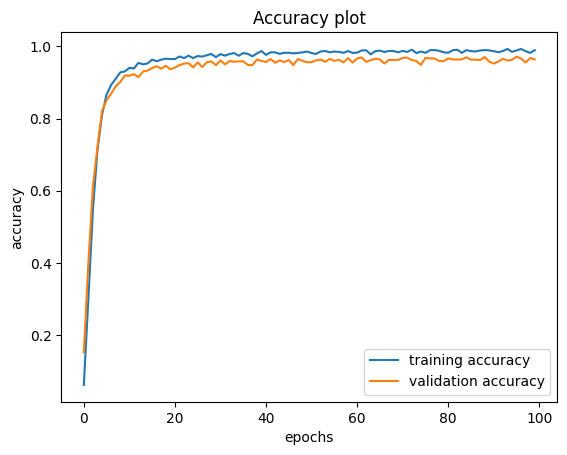

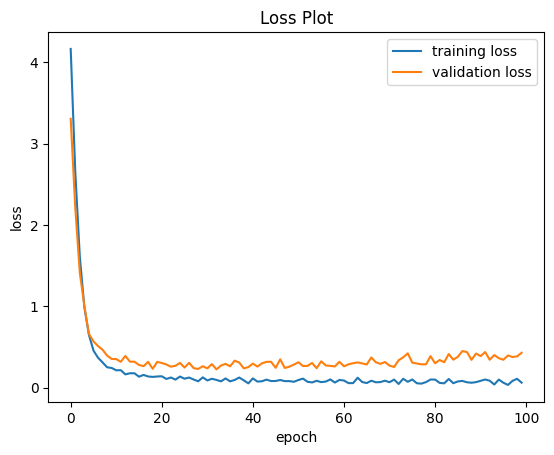

In [10]:
#plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label = "training loss")
plt.plot(history.history['val_loss'], label = "validation loss")
plt.title("Loss Plot")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

In [11]:
model.save('models/dense_v2.h5')

In [12]:
import caro_part5 as caro
b = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],

pred = model.predict(b)
# print(pred)
pred = np.argmax(pred,axis=1)
print(pred // 20, pred % 20)

caro.show_chess_board(b[0])
# for i in b[0]:
#     for j in i:
#         print(j)
#         break
#         if j == 0:
#             print('.', end=' ')
#         if j == 1:
#             print('X', end=' ')
#         if j == -1:
#             print('O', end=' ')
#     print('\n')


1/1 [==============================] - 0s 321ms/step
[1] [18]
    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  

0   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  X  .   
1   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  0  .  .   
2   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
3   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
4   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
5   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
6   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
7   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
8   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
9   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
10   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
11   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
12   .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .  .   
1